### Handling Missing Values on Continuous Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Types of Missing Data

#### Missing Completely At Random (MCAR)
    
    There is absolutely no relationship between the data missing and any other values, observed or missing within the dataset

#### Missing Data Not At Random (MNAR): Systematic Missing Values
    
    There is absolutely some relationship between the data missing and an-y other values, observed or missing within the dataset

In [2]:
df = pd.read_csv('./CSV Files/titanic_train.csv')

In [3]:
df.head(4)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1


In [4]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [5]:
df.drop(['boat', 'body', 'home.dest'], axis=1, inplace=True)

In [6]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
survived          0
dtype: int64

In [7]:
df[df['embarked'].isnull()]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
109,168,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1


#### Observation:

Embarked is the data which is Missing Completely At Random (MCAR)

Age and Cabin is the data which is Missing Not At Random (MNAR)

In [8]:
df.shape

(850, 12)

In [9]:
df['cabin_null'] = np.where(df['cabin'].isnull(), 1, 0)

In [10]:
df.head(4)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,cabin_null
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,1,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,0,1
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,0,1
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,1,1


In [11]:
df['cabin_null'].sum()

659

In [12]:
# Percentage of Null Values in cabin

Percentage = (df['cabin_null'].sum()) / df.shape[0]
Percentage = Percentage * 100

In [13]:
Percentage

77.52941176470588

In [14]:
df['cabin_null'].mean()

0.7752941176470588

In [15]:
df_groupby_sex = df.groupby('sex')

In [16]:
df_groupby_sex.size()

sex
female    299
male      551
dtype: int64

In [17]:
df_groupby_sex.first()

,passenger_id,pclass,name,age,sibsp,parch,ticket,fare,cabin,embarked,survived,cabin_null
sex,,,,,,,,,,,,
female,1216,3,"Smyth, Miss. Julia",30.0,0,0,335432,7.7333,D15,Q,1,1
male,699,3,"Cacic, Mr. Luka",38.0,0,0,315089,8.6625,C82,S,0,1


In [18]:
df_groupby_sex.last()

,passenger_id,pclass,name,age,sibsp,parch,ticket,fare,cabin,embarked,survived,cabin_null
sex,,,,,,,,,,,,
female,1112,3,"Peacock, Miss. Treasteall",3.0,1,1,SOTON/O.Q. 3101315,13.775,C78,S,0,1
male,425,2,"Greenberg, Mr. Samuel",52.0,0,0,250647,13.000,B37,S,0,1


In [19]:
df.groupby('sex')['age'].mean()

sex
female    28.858401
male      29.898256
Name: age, dtype: float64

In [20]:
df.groupby('sex').age.max()

sex
female    76.0
male      80.0
Name: age, dtype: float64

In [21]:
data = {
  'co2': [95, 90, 99, 104, 105, 94, 99, 104],
  'model': ['Citigo', 'Fabia', 'Fiesta', 'Rapid', 'Focus', 'Mondeo', 'Octavia', 'B-Max'],
  'car': ['Skoda', 'Skoda', 'Ford', 'Skoda', 'Ford', 'Ford', 'Skoda', 'Ford']
}

df_data = pd.DataFrame(data)

In [22]:
df_data

,co2,model,car
0,95,Citigo,Skoda
1,90,Fabia,Skoda
2,99,Fiesta,Ford
3,104,Rapid,Skoda
4,105,Focus,Ford
5,94,Mondeo,Ford
6,99,Octavia,Skoda
7,104,B-Max,Ford


In [23]:
print(df_data.groupby(["car"]).mean())

         co2
car         
Ford   100.5
Skoda   97.0


In [24]:
df_groupby_sex.size().reset_index().rename(columns={0: 'Count'})

,sex,Count
0,female,299
1,male,551


In [25]:
df_groupby_sex.get_group('female')

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived,cabin_null
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,1,1
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,0,1
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,1,1
7,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S,1,1
8,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,333,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S,1,0
841,208,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,1,0
842,709,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q,1,1
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,1,1


In [26]:
df_groupby_sex.ngroups

2

## Mean/Median/Mode Imputation

In [27]:
## Mean/Median Imputation


df = pd.read_csv('./CSV Files/titanic_train.csv', usecols=['age', 'fare', 'survived'])

In [28]:
df.head(5)

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [29]:
df.isnull().sum()

age         174
fare          1
survived      0
dtype: int64

In [30]:
df.isnull().mean()

age         0.204706
fare        0.001176
survived    0.000000
dtype: float64

In [31]:
median = df.age.median()
median

28.0

In [32]:
def impute_nan(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median)

In [33]:
impute_nan(df, 'age', median)

In [34]:
df.head()

,age,fare,survived,age_median
0,NaN,7.7333,1,28.0
1,38.0,8.6625,0,38.0
2,30.0,24.1500,0,30.0
3,54.0,23.0000,1,54.0
4,40.0,13.0000,0,40.0


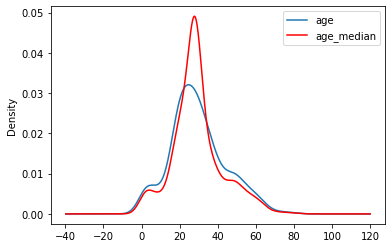

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.age.plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [36]:
mode = df.age.mode()
mode

0    18.0
dtype: float64

In [37]:
df.age.value_counts().reset_index().rename(columns={'index': 'Age', 'age': 'Count'})

,Age,Count
0,18.0,32
1,30.0,30
2,24.0,29
3,22.0,28
4,25.0,26
...,...,...
83,55.5,1
84,40.5,1
85,26.5,1
86,18.5,1


In [38]:
df.age.median()

28.0